In [1]:
import OMPython
from OMPython import OMCSessionZMQ

In [2]:
omc = OMCSessionZMQ()

In [3]:
omc.sendExpression("getVersion()")

'OpenModelica v1.16.2 (64-bit)'

In [4]:
omc.sendExpression("cd()")

'C:/Users/uapug'

In [5]:
omc.sendExpression("loadModel(Modelica)")

True

In [6]:
omc.sendExpression("loadFile(getInstallationDirectoryPath() + \"/share/doc/omc/testmodels/Disinfection.mo\")")

True

In [7]:
omc.sendExpression("instantiateModel(Disinfection)")

'class Disinfection\n  Real N(start = 1000.0);\n  Real C(start = 0.3) "mg/L";\n  constant Real lamda_CW = 0.0017 " s*mg/L)^-1";\n  constant Real k_growth = 3.3e-005 "1/s";\n  constant Real k_decay = 0.00017 "1/s";\ninitial equation\n  N = 1000.0;\n  C = 0.3;\nequation\n  der(C) = (-0.00017) * C;\n  if C >= 0.01 then\n    der(N) = (-0.0017) * C * N;\n  else\n    der(N) = 3.3e-005 * N;\n  end if;\nend Disinfection;\n'

In [8]:
cmds = [
  'loadFile(getInstallationDirectoryPath() + "/share/doc/omc/testmodels/Disinfection.mo")',
  "simulate(Disinfection)",
  "plot(der(C))"
  ]

cmds

In [9]:
cmds

['loadFile(getInstallationDirectoryPath() + "/share/doc/omc/testmodels/Disinfection.mo")',
 'simulate(Disinfection)',
 'plot(der(C))']

In [10]:
for cmd in cmds:
    answer = omc.sendExpression(cmd)
    print("\n{}:\n{}".format(cmd, answer))


loadFile(getInstallationDirectoryPath() + "/share/doc/omc/testmodels/Disinfection.mo"):
True

simulate(Disinfection):
{'resultFile': 'C:/Users/uapug/Disinfection_res.mat', 'simulationOptions': "startTime = 0.0, stopTime = 1.0, numberOfIntervals = 500, tolerance = 1e-006, method = 'dassl', fileNamePrefix = 'Disinfection', options = '', outputFormat = 'mat', variableFilter = '.*', cflags = '', simflags = ''", 'messages': 'LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.\nLOG_SUCCESS       | info    | The simulation finished successfully.\n', 'timeFrontend': 0.5812588, 'timeBackend': 0.0307314, 'timeSimCode': 0.0077575, 'timeTemplates': 0.1028909, 'timeCompile': 20.023261, 'timeSimulation': 0.4689131, 'timeTotal': 21.2181127}

plot(der(C)):
True


In [2]:
import pandas as pd

df = pd.read_excel("Sample Data BT free 20190103.xlsx", skiprows=26)
df.head(10)


,Datetime,Reg/Trx,Meas,Label,T comp. ° F,Reg. out,Reg/Trx.1,Cl_level,Label.1,T comp. ° F.1,Reg. out.1,Reg/Trx.2,PH_level,Label.2,T comp. ° F.2,Reg. out.2,Mode,Value,Raw
0,2019-01-03 14:23:00,T,1.558,ppm Free Cl2,--,--,T,2.091,ppm Free Cl2,--,--,T,7.000,pH,48.5,--,M,0,0
1,2019-01-03 14:22:00,T,1.558,ppm Free Cl2,--,--,T,2.087,ppm Free Cl2,--,--,T,6.999,pH,48.5,--,M,0,0
2,2019-01-03 14:21:00,T,1.559,ppm Free Cl2,--,--,T,2.086,ppm Free Cl2,--,--,T,6.999,pH,48.5,--,M,0,0
3,2019-01-03 14:20:00,T,1.558,ppm Free Cl2,--,--,T,2.081,ppm Free Cl2,--,--,T,6.999,pH,48.5,--,M,0,0
4,2019-01-03 14:19:00,T,1.558,ppm Free Cl2,--,--,T,2.072,ppm Free Cl2,--,--,T,6.999,pH,48.5,--,M,0,0
5,2019-01-03 14:18:00,T,1.560,ppm Free Cl2,--,--,T,2.063,ppm Free Cl2,--,--,T,6.999,pH,48.5,--,M,0,0
6,2019-01-03 14:17:00,T,1.559,ppm Free Cl2,--,--,T,2.062,ppm Free Cl2,--,--,T,6.999,pH,48.5,--,M,0,0
7,2019-01-03 14:16:00,T,1.558,ppm Free Cl2,--,--,T,2.061,ppm Free Cl2,--,--,T,6.999,pH,48.5,--,M,0,0
8,2019-01-03 14:15:00,T,1.559,ppm Free Cl2,--,--,T,2.062,ppm Free Cl2,--,--,T,6.999,pH,48.5,--,M,0,0
9,2019-01-03 14:14:00,T,1.559,ppm Free Cl2,--,--,T,2.068,ppm Free Cl2,--,--,T,6.999,pH,48.5,--,M,0,0


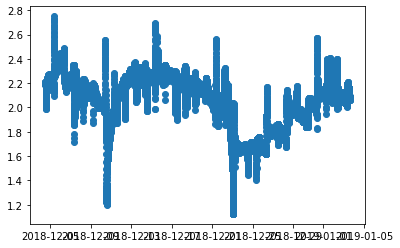

In [3]:
from matplotlib import pyplot as plt
plt.scatter(df["Datetime"],df["Cl_level"])
plt.show()